# Visualizing RMS Grid datasets in the sandbox

First we import the necessary modules:

In [1]:
import os,sys
#set the path to the Sandbox repository
sys.path.append('../../sandbox')
#import the sandbox
import sandbox as sb
import matplotlib.pyplot as plt

Freenect module not found, KinectV1 will not work.
pykinect2 module not found, KinectV2 will not work.


## Block Module
The Sandbox.BlockModule class contains all necessary methods to visualize RMS grid data. In the following steps we will create an instance of the module and load one or more RMS grids from VIP Datasets. Furthermore we will call methods to specify a custom colorbar and range for some datasets. 
For now the dimensions of the RMS grid are scaled to the dimensions of the sandbox, so if you need for example a larger vertical block size, adjust the vertical range accordingly. The horizontal aspect ratio of the sandbox is 1.2:1. Any model with a similar aspect ratio should look just fine. 

In [2]:
#instantiate the block module module to display RMS Grids:
module = sb.RMS_Grid()

In [3]:
# specify path to the folder where the grids are stored: 
grid_folder='/Users/simon/Documents/Equinor/grids/'

#load a dataset 
module.load_model_vip(grid_folder+'VIP_for_UKA.corp')

#optional: load an additional block file and append it to the loaded dataset:
#you can import multiple datasets as long as they share the model dimensions nx,ny,nz.

additional_block_file=open(grid_folder+'VIP_ntg_fluid.fluid.inc', 'r')
module.parse_block_vip(additional_block_file, module.block_dict,"fluid", module.nx, module.ny, module.nz)

additional_block_file=open(grid_folder+'VIP_ntg_fluid.ntg.inc', 'r')
module.parse_block_vip(additional_block_file, module.block_dict,"ntg", module.nx, module.ny, module.nz)

#show the loaded datasets:
module.block_dict.keys()

nx ny, nz:
120 166 105
loading cell positions
processing coordinates in layer 0
processing coordinates in layer 1
processing coordinates in layer 2
processing coordinates in layer 3
processing coordinates in layer 4
processing coordinates in layer 5
processing coordinates in layer 6
processing coordinates in layer 7
processing coordinates in layer 8
processing coordinates in layer 9
processing coordinates in layer 10
processing coordinates in layer 11
processing coordinates in layer 12
processing coordinates in layer 13
processing coordinates in layer 14
processing coordinates in layer 15
processing coordinates in layer 16
processing coordinates in layer 17
processing coordinates in layer 18
processing coordinates in layer 19
processing coordinates in layer 20
processing coordinates in layer 21
processing coordinates in layer 22
processing coordinates in layer 23
processing coordinates in layer 24
processing coordinates in layer 25
processing coordinates in layer 26
processing coordina

dict_keys(['mask', 'FaultBlock', 'Zone'])

## create reservoir topography map


In [4]:
module.create_reservoir_topo()

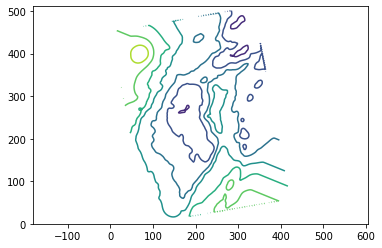

In [33]:
#preview the reservoir topography:
plt.axis('equal')
plt.contour(module.reservoir_topography)

## convert to a regular grid
interpolate and convert the irregular RMS grids into a regular grid. 
The default values for the regridding are the native resolution of the kinect and 100 depth levels. you can change the defaults by setting module.regridding_resolution, e.g. for testing (lower resolution will calculate a bit faster)

In [6]:
#module.regridding_resolution = [100,80,50] 
module.convert_to_regular_grid()

processing grid:  mask
done!
processing grid:  FaultBlock
done!
processing grid:  Zone
done!


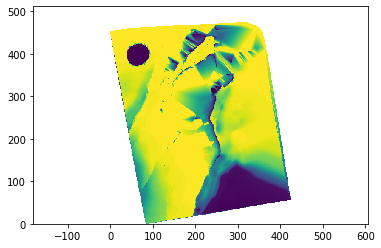

In [36]:
# preview a slice from the dataset
depth = 50
key = 'Zone'

block=module.regular_grid_dict[key]
plt.axis('equal')
plt.pcolormesh(block[:,:,depth])

## manipulation in runtime
the sandbox is running in a separate thread. that means that you can make (some) changes while the sandbox is running. One build in example is the dataset selector widget that you can use to switch between the visualized datasets in runtime.

For all other changes you make to any parameters it is important that you acquire and release the module's thread lock object (module.lock) each time that you want to make any changes. This way you make sure that you do not write any data that the sandbox is currently trying to access (which might lead to some unexpected behaviour).

Here are some examples of changes you can make: 

In [ ]:
# show a selector widget to switch between the currently shown datasets:

module.show_selector()

In [ ]:
# change the gaussian filter parameter of the sensor

with module.lock:
    print("sigma gauss was: "+str(sensor.sigma_gauss) )
    sensor.sigma_gauss=5
    

In [ ]:
# change the colormap of a dataset

with module.lock:
    module.set_colormap('fluid',
                        cmap=module.create_cmap(['red','white','green']),
                        norm=module.create_norm(0,2)
                       )

## stop the sandbox
to stop the sandbox from running you have two options: Either restart the kernel or manually terminate the sandbox thread with module.stop()

Using the stop() method has two advantages: all your variables  are still there and you can restart your sandbox any time you like by calling module.run() again.

In [ ]:
# execute this cell to stop the sandbox thread:
module.stop()

In [ ]:
module.pause()
module.plot.contours_step=100
module.resume()

In [ ]:
calibrate=sb.CalibModule(calib,sensor,projector)
calibrate.calibrate()

In [ ]:
module.pause()
module.plot.contours=True
module.resume()

In [ ]:
module.coords_x[0,0,0]